### Practice Assignment 3

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]


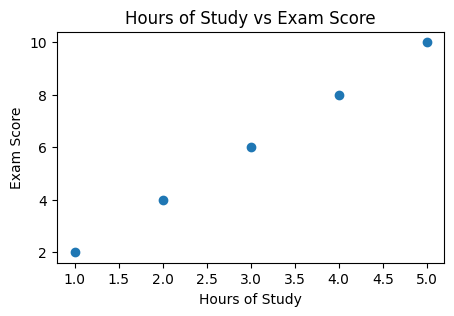

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('train.csv')
X = data['Hours of Study (x)'].values
y = data['Exam Score (y)'].values
X = X.reshape(-1, 1)
X = np.c_[np.ones(X.shape[0]), X]
#create a plot
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 1], y)
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Hours of Study vs Exam Score')
plt.show()

print(X)


### Gradient Descent

[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[ -2.  -4.  -6.  -8. -10.]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-1.72 -3.5  -5.28 -7.06 -8.84]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-1.4732 -3.0592 -4.6452 -6.2312 -7.8172]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-1.255672 -2.670596 -4.08552  -5.500444 -6.915368]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-1.06395272 -2.32801264 -3.59207256 -4.85613248 -6.1201924 ]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-0.89498862 -2.02600516 -3.15702171 -4.28803825 -5.4190548 ]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-0.74608742 -1.75977298 -2.77345855 -3.78714411 -4.80082967]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-0.61487537 -1.52508346 -2.43529156 -3.34549965 -4.25570775]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-0.49925954 -1.31820473 -2.13714992 -2.9560951  -3.77504029]
(2, 5)
(5,)
[[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]]
[-0.39739464 -1.13584643 -1.87429821 -2.61275    -3.3512017

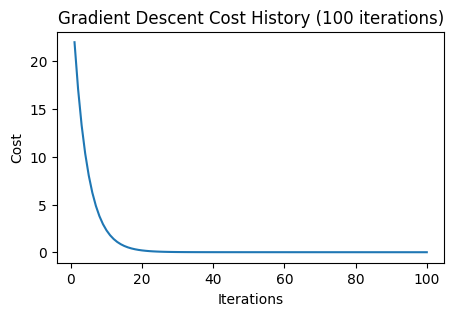

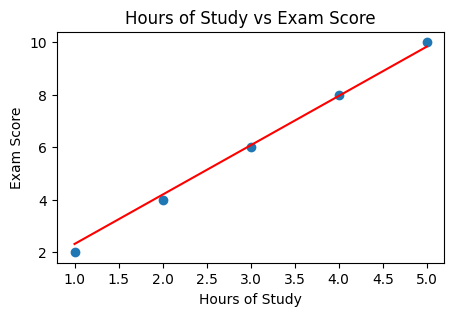

In [62]:
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(iterations):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
    
    return theta, cost_history

theta_gd, cost_history_gd = gradient_descent(X, y)
#plot cost history
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(cost_history_gd) + 1), cost_history_gd)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost History (100 iterations)')
plt.show()


y_pred_gd = X.dot(theta_gd)

#plot the line , orginal data and predicted data
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_gd, color='red')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Hours of Study vs Exam Score')
plt.show()




### Stochastic Gradient Descent

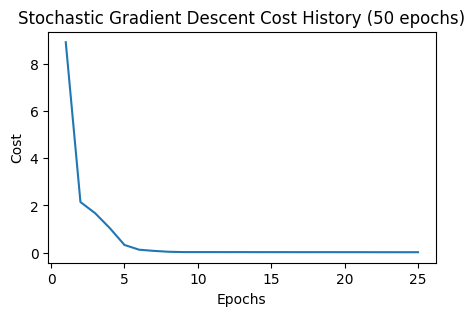

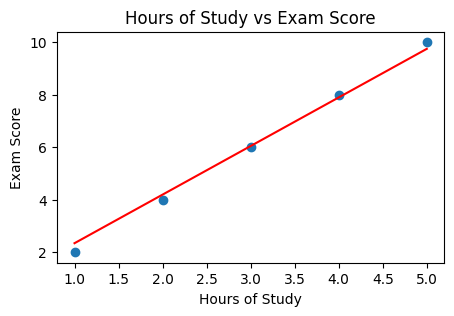

In [46]:

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=25):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            h = xi.dot(theta)
            gradient = xi.T.dot(h - yi)
            theta -= learning_rate * gradient
        
        h = X.dot(theta)
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
    
    return theta, cost_history

theta_sgd, cost_history_sgd = stochastic_gradient_descent(X, y)
#plot cost history
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(cost_history_sgd) + 1), cost_history_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent Cost History (50 epochs)')
plt.show()


y_pred_sgd = X.dot(theta_sgd)

#plot the line
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_sgd, color='red')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Hours of Study vs Exam Score')
plt.show()


Certainly. Let's break down the matrix multiplication method used in gradient descent, focusing on the shapes of the matrices involved. We'll use our simple linear regression example to illustrate this.

Given:
- X: input matrix (features)
- y: target vector
- θ (theta): parameter vector

1. X (input matrix)
   Shape: (m, n) where m is the number of samples, n is the number of features (including bias)
   
   For our example with 5 samples and 1 feature (plus bias):
   ```
   X = [
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5]
   ]
   ```
   Shape: (5, 2)

2. y (target vector)
   Shape: (m,) or (m, 1)
   
   For our example:
   ```
   y = [2, 4, 6, 8, 10]
   ```
   Shape: (5,) or (5, 1)

3. θ (parameter vector)
   Shape: (n,) or (n, 1)
   
   Initially:
   ```
   θ = [0, 0]
   ```
   Shape: (2,) or (2, 1)

Now, let's go through the matrix multiplications:

1. Hypothesis calculation: h = X.dot(θ)
   - X shape: (5, 2)
   - θ shape: (2,) or (2, 1)
   - Resulting h shape: (5,) or (5, 1)
   
   Calculation:
   ```
   [1 1] [θ0]   [1*θ0 + 1*θ1]
   [1 2] [θ1] = [1*θ0 + 2*θ1]
   [1 3]        [1*θ0 + 3*θ1]
   [1 4]        [1*θ0 + 4*θ1]
   [1 5]        [1*θ0 + 5*θ1]
   ```

2. Error calculation: (h - y)
   - h shape: (5,) or (5, 1)
   - y shape: (5,) or (5, 1)
   - Resulting shape: (5,) or (5, 1)

3. Gradient calculation: gradient = (1/m) * X.T.dot(h - y)
   - X.T shape: (2, 5) (transpose of X)
   - (h - y) shape: (5,) or (5, 1)
   - Resulting gradient shape: (2,) or (2, 1)
   
   Calculation:
   ```
   1/m * [1 1 1 1 1] [e1]   [1*e1 + 1*e2 + 1*e3 + 1*e4 + 1*e5]
         [1 2 3 4 5] [e2] = [1*e1 + 2*e2 + 3*e3 + 4*e4 + 5*e5]
                     [e3]
                     [e4]
                     [e5]
   ```
   Where e1, e2, etc., are the elements of (h - y).

4. Parameter update: θ -= learning_rate * gradient
   - θ shape: (2,) or (2, 1)
   - gradient shape: (2,) or (2, 1)
   - Resulting θ shape: (2,) or (2, 1)

   This is element-wise subtraction:
   ```
   [θ0]   [g0]
   [θ1] - [g1]
   ```
   Where g0 and g1 are the elements of the gradient multiplied by the learning rate.

Key points:
- The dot product X.dot(θ) multiplies each row of X with θ to get a prediction for each sample.
- X.T.dot(h - y) multiplies each column of X (now rows of X.T) with the error vector, summing the errors weighted by each feature.
- The shapes must be compatible for matrix multiplication: (m, n) * (n, p) results in (m, p).
- Broadcasting in numpy allows operations between (m,) and (m, 1) shaped arrays.

This matrix approach efficiently computes the hypothesis, error, and gradient for all samples simultaneously, making the algorithm much faster than calculating each sample individually.